<a href="https://colab.research.google.com/github/RecaSakura/10924119-10924109/blob/main/DeepFace_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##安裝函式庫

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=9f688f7a781865c03195e08d231cbb77c25202c24930ff1b128b543b8c8267a5
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


##開始測試

In [ ]:
from deepface import DeepFace as dp
import cv2

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


底下這段代碼作用是使用matplotlib將圖片顯示顯示出來

In [ ]:
def show_image(*args):
    k = len(args)
    fig = plt.figure(figsize=(5*k, 5))
    for i, photo in enumerate(args):
        plt.subplot(1,k,i+1)
        plt.axis('off')
        plt.axis('equal')
        plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))

###比對兩張照片是否為同一人

定義圖片路徑

In [ ]:
base_dir = "/content/drive/MyDrive/專題製作-具人格特質聊天機器人/TestImages"
face_dir = "/content/drive/MyDrive/專題製作-具人格特質聊天機器人/TestImages/face"

In [ ]:
base_dir = "/home/recasakura/桌面"
face_dir = "/home/recasakura/桌面"

In [ ]:
im01_path = base_dir + '/' + "IMG1.jpg"
im01 = cv2.imread(im01_path)
###嫌麻煩也可以直接 im01_path = base_dir/content/drive/MyDrive/img.jpg

In [ ]:
im02_path = "C/桌面"
im02 = cv2.imread(im02_path)

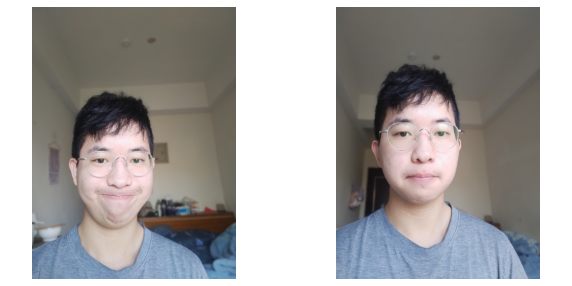

In [ ]:
show_image(im01, im02)
###使用剛剛def的副程式 show出圖片，若只想show一張就只需要show_image(im01)

In [ ]:
### result為辨識後的各項數據
result  = dp.verify(im01, im02, model_name="DeepFace")
result

{'verified': True,
 'distance': 0.19951417603681987,
 'threshold': 0.23,
 'model': 'DeepFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 475, 'y': 1410, 'w': 1109, 'h': 1109},
  'img2': {'x': 456, 'y': 1071, 'w': 1175, 'h': 1175}},
 'time': 11.36}

In [ ]:
###也可以只顯示兩張照片是否為同一人
if(result['verified'])==True:
  print("兩人為同一人")
else:
  print("兩人不同人")

兩人為同一人


###辨識人種、性別、年齡、情緒

底下程式是將辨識後的資料以簡潔的方式顯示出來

In [ ]:
###labels將obj裡的資料，轉換成中文
labels = {'angry':'生氣', 'disgust':'厭惡', 'fear':'恐懼',
          'happy':'開心', 'neutral':'普通', 
          'sad':'悲傷', 'surprise':'吃驚',
          'Man':'男', 'Woman':'女',
          'asian':'亞洲', 'black':'黑', 'indian':'印弟安',
          'latino hispanic':'拉丁美洲 (西班牙裔)', 
          'middle eastern':'中東', 'white':'白'}
###obj裡有不少數據，如同剛剛的result一樣，這段程式的作用就是將它可視化，不然輸出的數據會很雜亂
def show_info(obj):
    age = obj[0]["age"]
    emotion = labels[obj[0]['dominant_emotion']]
    race = labels[obj[0]['dominant_race']]
    gender = labels[obj[0]['dominant_gender']]
    text = f"這是一位 {age} 歲的{race}人{gender}性, 他的表情是{emotion}的。"
    print(text)

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


這是一位 34 歲的亞洲人男性, 他的表情是悲傷的。


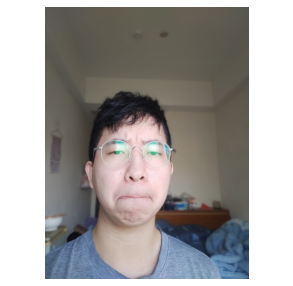

In [ ]:
im03_path = base_dir + '/' + "IMG2.jpg"
im03 = cv2.imread(im03_path)
obj = dp.analyze(img_path = im03_path, actions = ['age', 'gender', 'race', 'emotion'])
show_image(im03)
show_info(obj)

In [ ]:
###上面的輸出文字是經過簡化與可視化的結果，若直接顯示obj則:
obj[0]

{'age': 27,
 'region': {'x': 537, 'y': 1455, 'w': 1107, 'h': 1107},
 'gender': {'Woman': 0.18314786721020937, 'Man': 99.81684684753418},
 'dominant_gender': 'Man',
 'race': {'asian': 99.99927282333374,
  'indian': 1.5001997155650315e-05,
  'black': 1.701037199985933e-07,
  'white': 0.0003110175157416961,
  'middle eastern': 1.1405072442016717e-07,
  'latino hispanic': 0.0004004386028100271},
 'dominant_race': 'asian',
 'emotion': {'angry': 0.04594368510879576,
  'disgust': 3.781720749884698e-05,
  'fear': 0.014255850692279637,
  'happy': 0.00011057578603868023,
  'sad': 6.9861553609371185,
  'surprise': 5.13807272284339e-06,
  'neutral': 92.9534912109375},
 'dominant_emotion': 'neutral'}

測試不同性別、人種

race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:01<00:00, 283MB/s]
Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]





這是一位 29 歲的亞洲人男性, 他的表情是開心的。


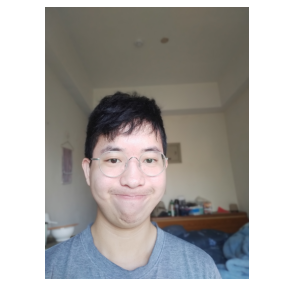

In [ ]:
im04_path = base_dir + "/IMG1.jpg"
im04 = cv2.imread(im04_path)
     

obj = dp.analyze(img_path = im04_path, actions = ['age', 'gender', 'race', 'emotion'])
show_image(im04)
print("\n\n")
show_info(obj)

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]





這是一位 36 歲的中東人男性, 他的表情是普通的。


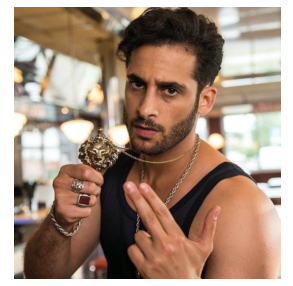

In [ ]:
im05_path = base_dir + "/lading.jpg"
im05 = cv2.imread(im05_path)
     

obj = dp.analyze(img_path = im05_path, actions = ['age', 'gender', 'race', 'emotion'])
show_image(im05)
print("\n\n")
show_info(obj)

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]








這是一位 32 歲的白人女性, 他的表情是開心的。


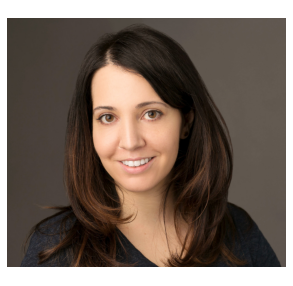

In [ ]:
im06_path = base_dir + "/Woman.jpg"
im06 = cv2.imread(im06_path)
     

obj = dp.analyze(img_path = im06_path, actions = ['age', 'gender', 'race', 'emotion'])
show_image(im06)
print("\n\n")
print("\n\n")
show_info(obj)

Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]





這是一位 31 歲的黑人女性, 他的表情是普通的。


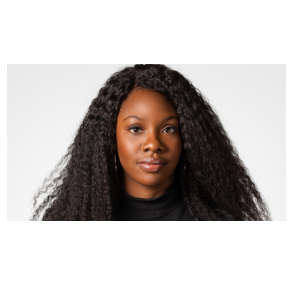

In [ ]:
im07_path = base_dir + "/blackwoman.jpg"
im07 = cv2.imread(im07_path)
     

obj = dp.analyze(img_path = im07_path, actions = ['age', 'gender', 'race', 'emotion'])
show_image(im07)
print("\n\n")
show_info(obj)

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]





這是一位 30 歲的白人女性, 他的表情是開心的。


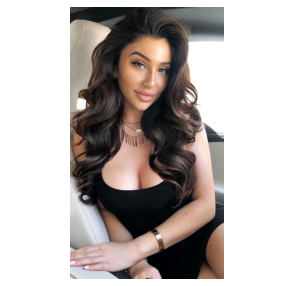

In [ ]:
im07_path = base_dir + "/Latina.jpg"
im07 = cv2.imread(im07_path)

obj = dp.analyze(img_path = im07_path, actions = ['age', 'gender', 'race', 'emotion'])
show_image(im07)
print("\n\n")
show_info(obj)

###同一張圖使用不同擷取臉部的模型

In [ ]:
###可以看到在上一張圖片，明顯不是白人，所以還是會有誤判
backends = ['opencv',   'ssd',   'dlib',   'mtcnn',   'retinaface']
###以下測試使用不同臉部擷取所帶來的效果

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]



 opencv 輸出結果:這是一位 30 歲的白人女性, 他的表情是開心的。
deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt
28.1kB [00:00, 18.9MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████| 10.7M/10.7M [00:00<00:00, 171MB/s]
Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]



 ssd 輸出結果:這是一位 27 歲的拉丁美洲 (西班牙裔)人女性, 他的表情是開心的。
shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2
100%|██████████| 5.71M/5.71M [00:02<00:00, 2.42MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]



 dlib 輸出結果:這是一位 31 歲的中東人女性, 他的表情是開心的。
1/1 [==============================] - 0s 151ms/step


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]



 mtcnn 輸出結果:這是一位 26 歲的白人女性, 他的表情是普通的。
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 66.1MB/s]
Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]



 retinaface 輸出結果:這是一位 29 歲的拉丁美洲 (西班牙裔)人女性, 他的表情是開心的。


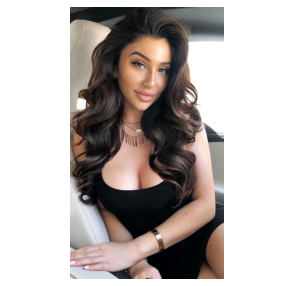

In [ ]:
im07_path = base_dir + "/Latina.jpg"
im07 = cv2.imread(im07_path)

obj = dp.analyze(img_path = im07_path, actions = ['age', 'gender', 'race', 'emotion'], detector_backend = backends[0])
print("\n",backends[0],"輸出結果:",end="")
show_info(obj)

obj = dp.analyze(img_path = im07_path, actions = ['age', 'gender', 'race', 'emotion'], detector_backend = backends[1])
print("\n",backends[1],"輸出結果:",end="")
show_info(obj)

obj = dp.analyze(img_path = im07_path, actions = ['age', 'gender', 'race', 'emotion'], detector_backend = backends[2])
print("\n",backends[2],"輸出結果:",end="")
show_info(obj)

obj = dp.analyze(img_path = im07_path, actions = ['age', 'gender', 'race', 'emotion'], detector_backend = backends[3])
print("\n",backends[3],"輸出結果:",end="")
show_info(obj)

obj = dp.analyze(img_path = im07_path, actions = ['age', 'gender', 'race', 'emotion'], detector_backend = backends[4])
print("\n",backends[4],"輸出結果:",end="")
show_info(obj)

show_image(im07)